In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os
import sys

In [2]:
current_dir = os.getcwd() # Obtener la ruta del directorio actual del notebook
ROOT_PATH = os.path.dirname(current_dir) # Obtener la ruta del directorio superior
sys.path.insert(1, ROOT_PATH) # Insertar la ruta en sys.path

import root 

# Carga de datos

In [3]:
client = pd.read_csv(root.DIR_DATA_RAW + 'client.csv')
electricity_prices = pd.read_csv(root.DIR_DATA_RAW + 'electricity_prices.csv')
gas_prices = pd.read_csv(root.DIR_DATA_RAW + 'gas_prices.csv')
historical_weather = pd.read_csv(root.DIR_DATA_RAW + 'historical_weather.csv')
forecast_weather = pd.read_csv(root.DIR_DATA_RAW + 'forecast_weather.csv')
train = pd.read_csv(root.DIR_DATA_RAW + 'train.csv')

# Datos faltantes

## Funcion para extrar datos faltantes

In [10]:
def get_null_rows(df):
    # Filtra las filas donde hay valores nulos en cualquier columna
    null_rows = df[df.isnull().any(axis=1)].copy()
    
    # Agrega una columna extra para indicar en qué columnas hay valores nulos
    null_rows['Null_Columns'] = null_rows.apply(lambda row: row[row.isnull()].index.tolist(), axis=1)
    
    return null_rows

## Train df

In [34]:
train_missing = get_null_rows(train)
train_missing.shape

(528, 10)

In [35]:
#train_missing.head()

<Axes: >

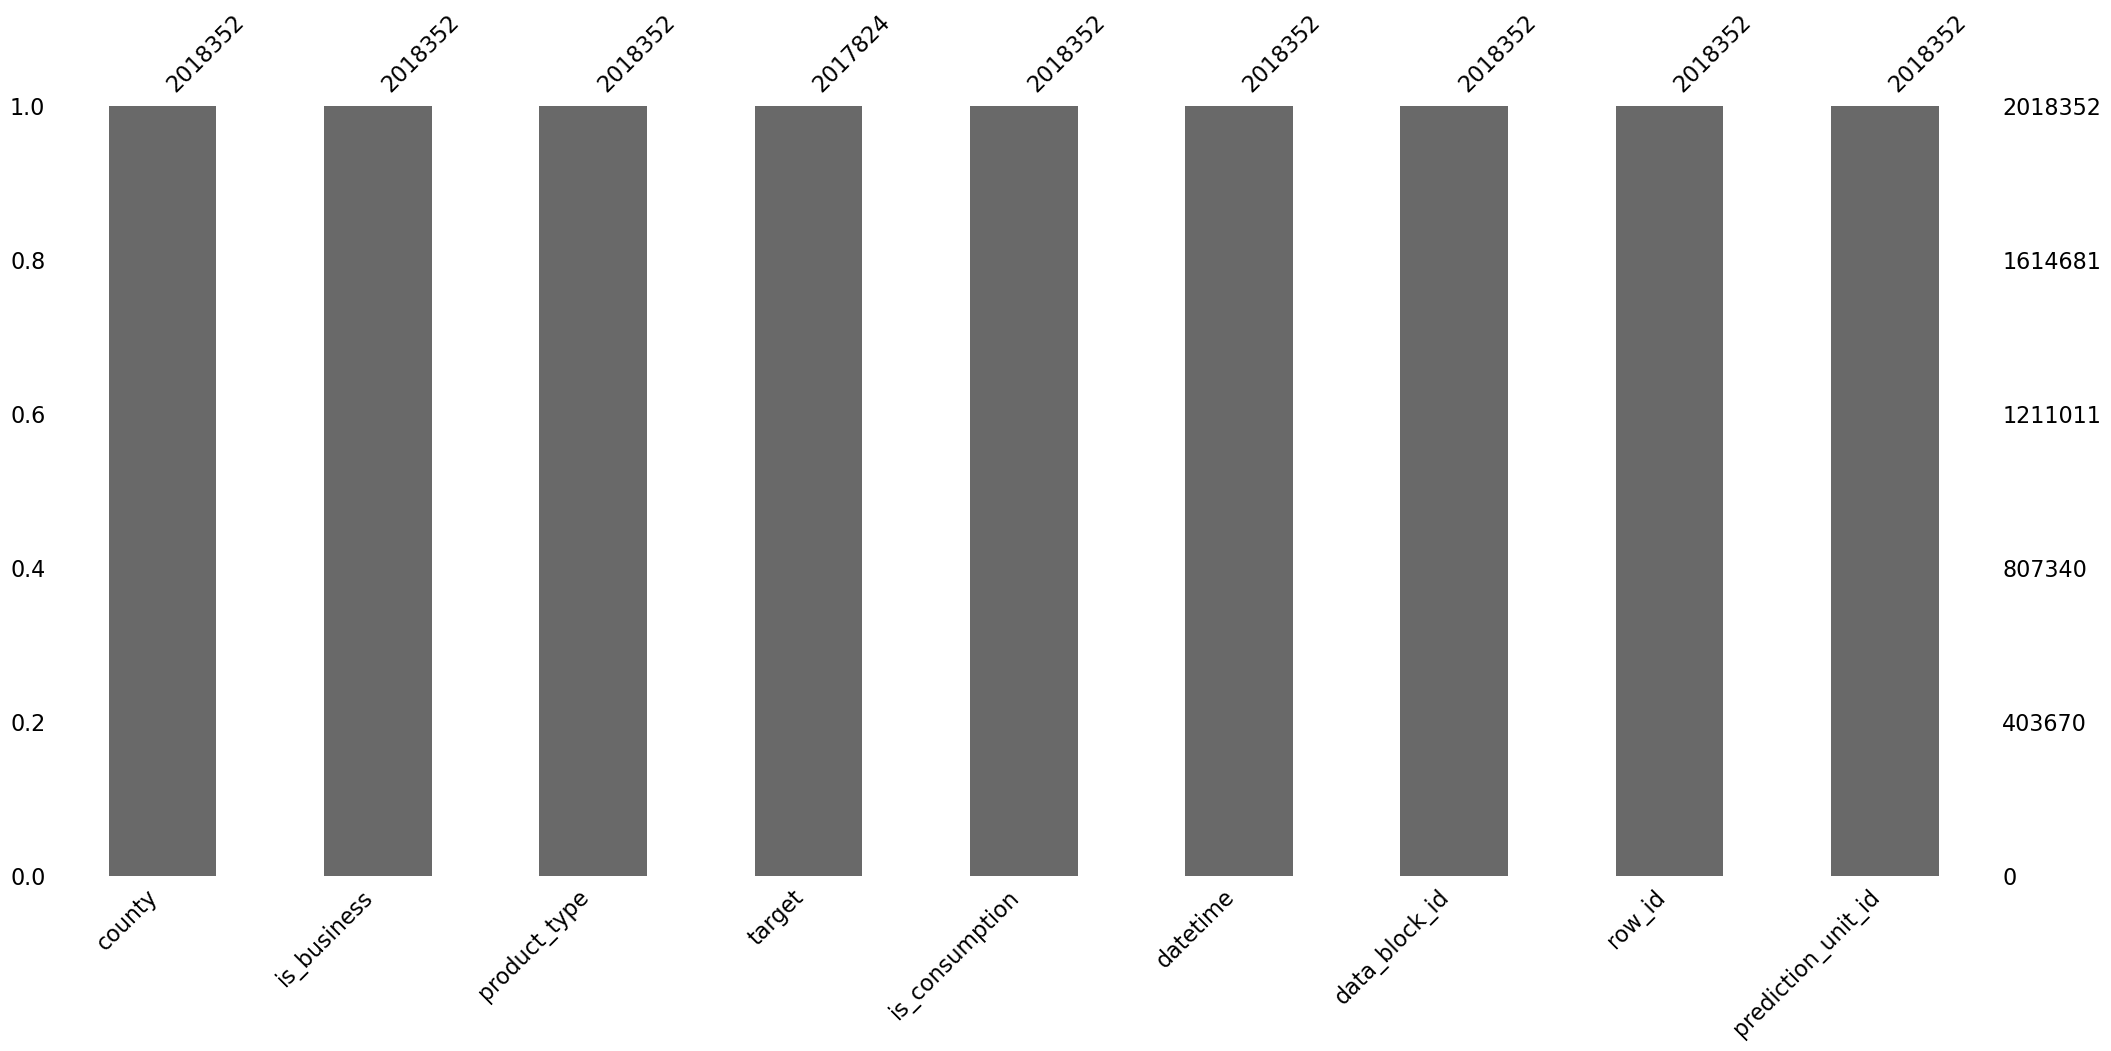

In [36]:
msno.bar(train)

<Axes: >

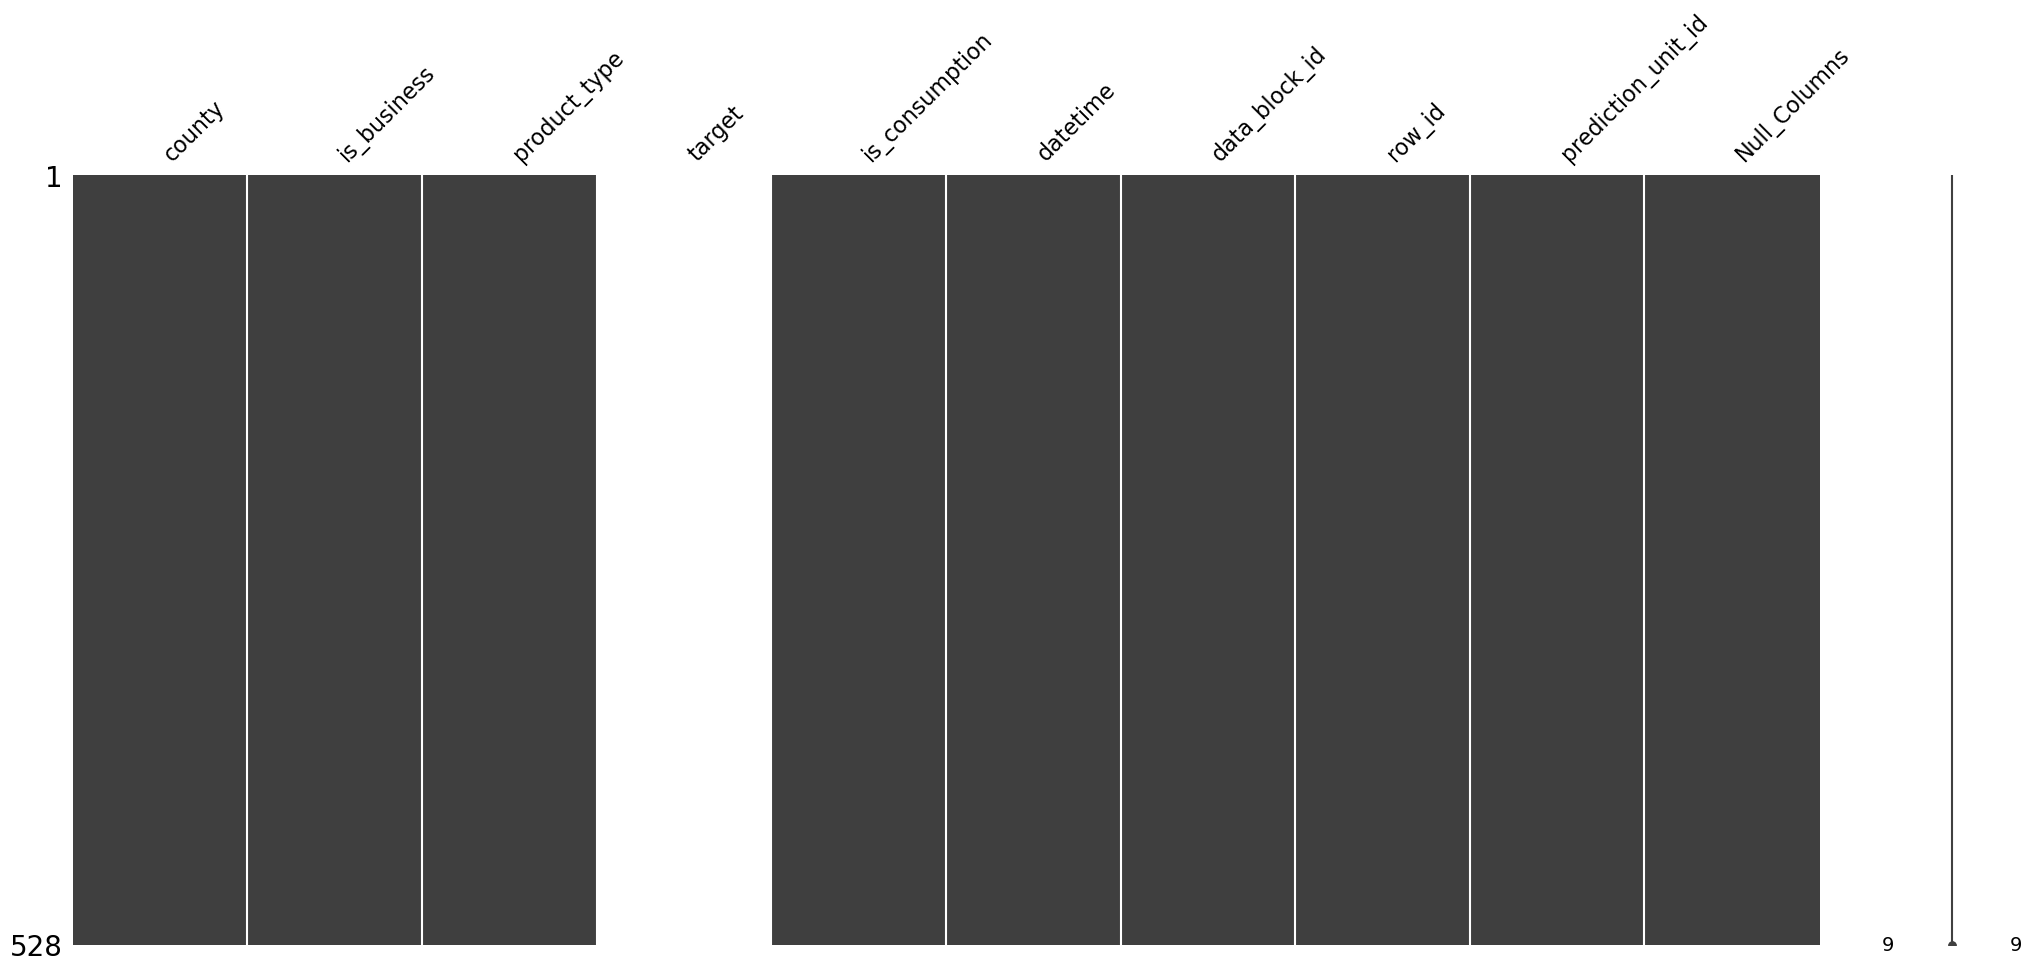

In [37]:
msno.matrix(train_missing)

## Client df

In [39]:
client_missing = get_null_rows(client)
client_missing.shape

(0, 8)

In [40]:
client_missing.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id,Null_Columns


## Electricity df

In [44]:
electricity_missing = get_null_rows(electricity_prices)
electricity_missing.shape

(0, 5)

## Gas df

In [45]:
gas_missing = get_null_rows(gas_prices)
gas_missing.shape

(0, 6)

## Historical weather df

In [46]:
HWeather_missing = get_null_rows(historical_weather)
HWeather_missing.shape

(0, 19)

## Forecast weather df

In [47]:
FWeather_missing = get_null_rows(forecast_weather)
FWeather_missing.shape

(2, 19)

In [48]:
FWeather_missing.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,Null_Columns
1849670,59.7,23.7,2022-08-11 02:00:00,3,19.043604,16.849023,0.908295,0.0,0.0,0.908295,5.913838,7.620130,345,2022-08-11 05:00:00,17.096667,NaN,0.0,0.0,[surface_solar_radiation_downwards]
1849782,59.7,23.7,2022-08-11 02:00:00,4,18.796777,16.994287,0.844788,0.0,0.0,0.844788,5.421923,8.103373,345,2022-08-11 06:00:00,206.413750,NaN,0.0,0.0,[surface_solar_radiation_downwards]


<Axes: >

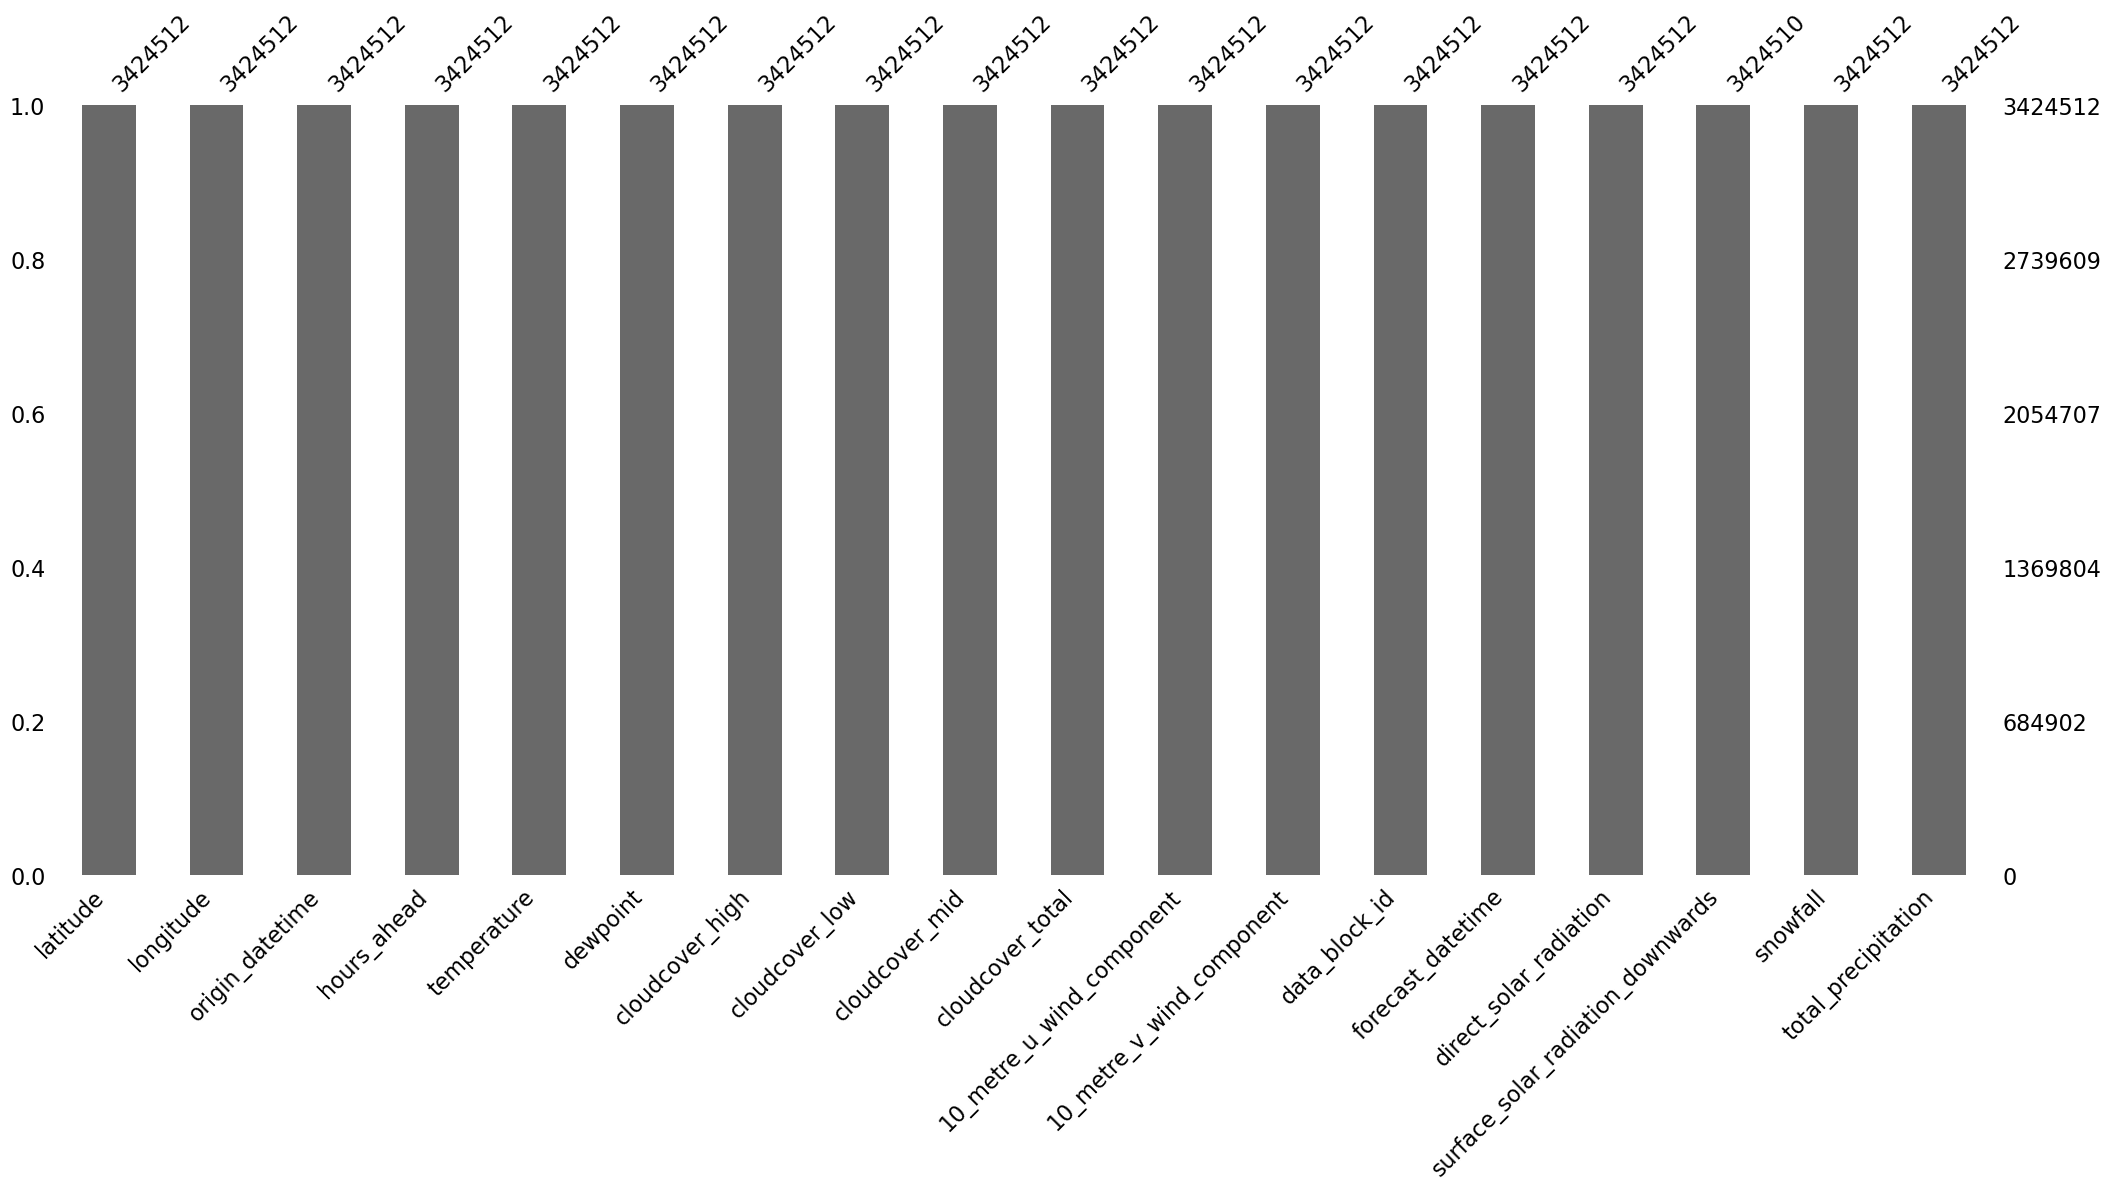

In [49]:
msno.bar(forecast_weather)

<Axes: >

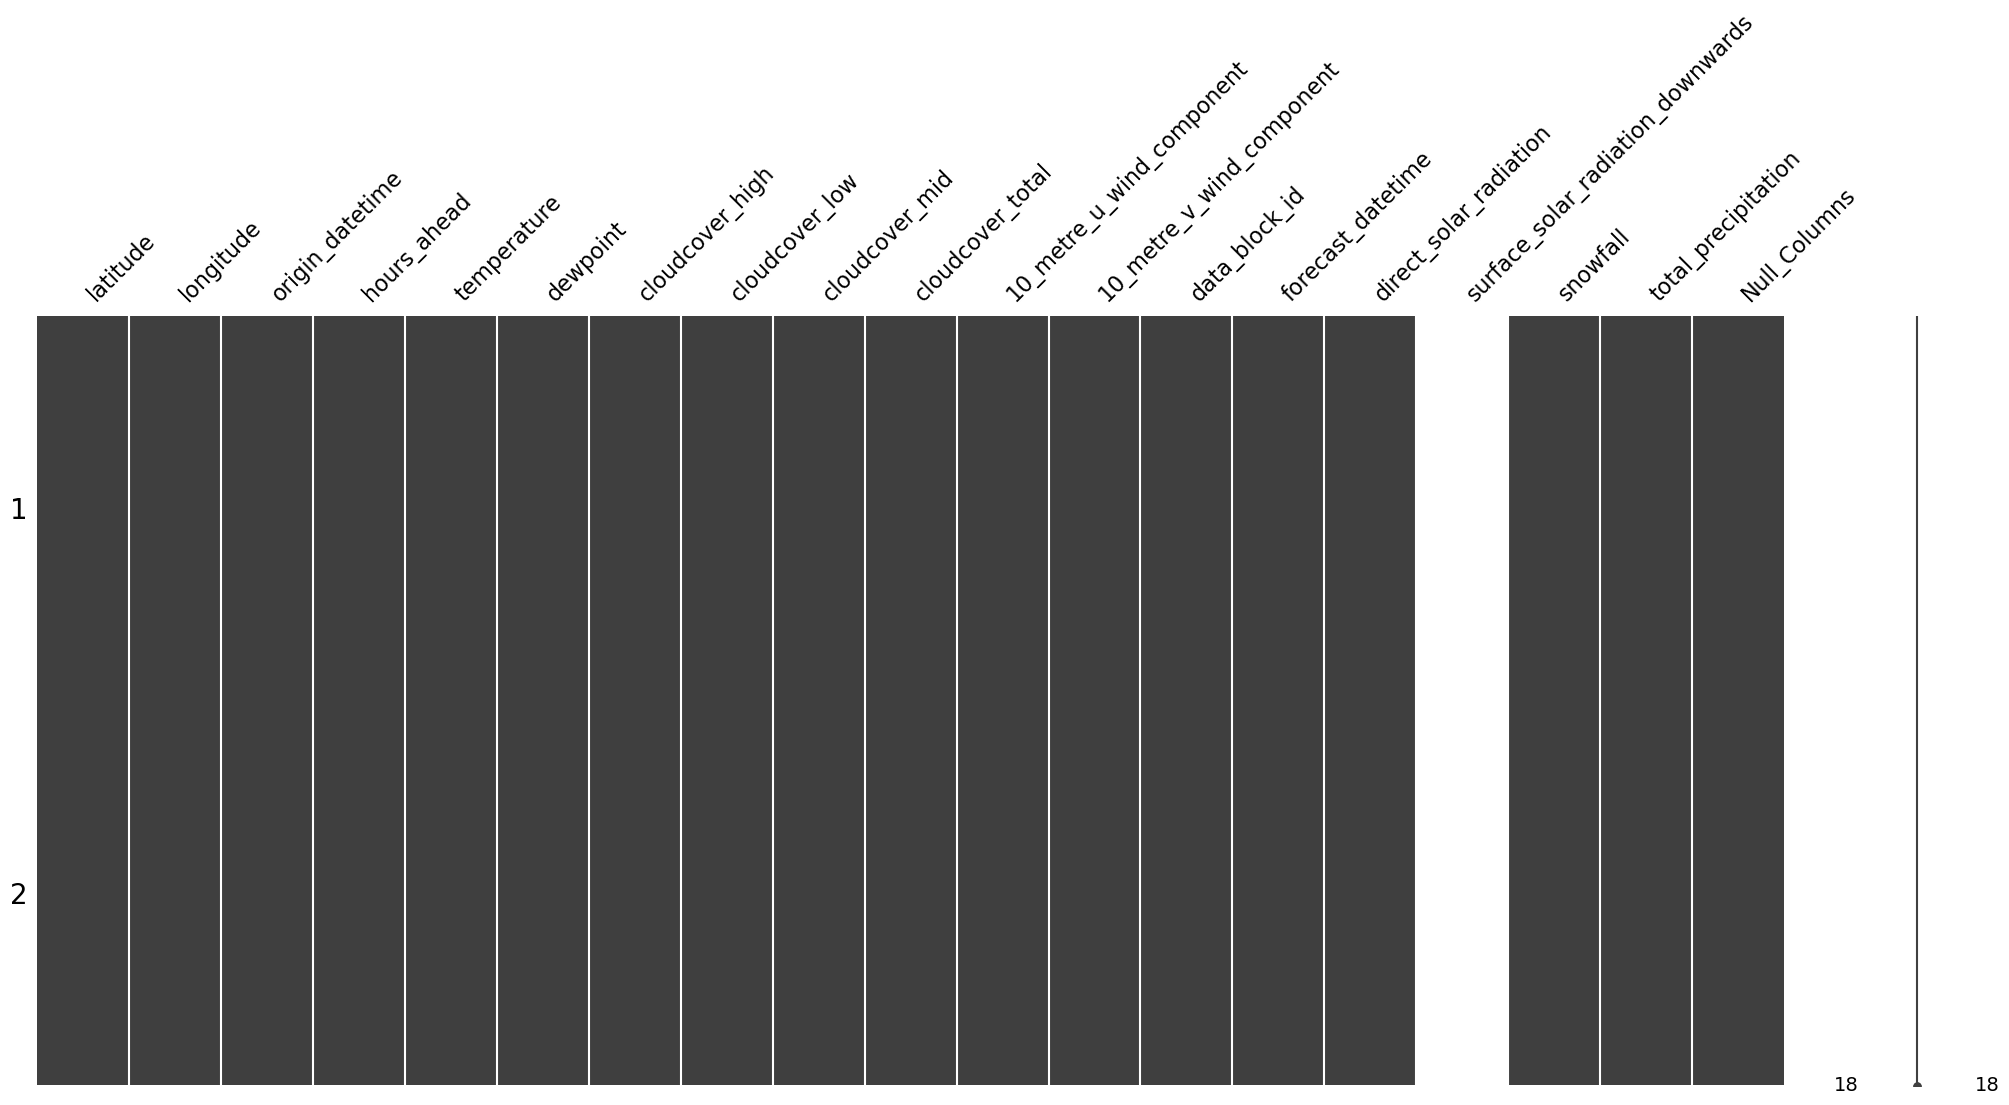

In [50]:
msno.matrix(FWeather_missing)